In [111]:
import pickle
from canny_cf import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
k = 10 # number of latent factors
FNAME = 'data/LasVegas_local.pck'
PROPORTION = .2 # Train to test percentage
ITERS = 20 # Number of times to run EM

with open(FNAME, 'rb') as pickle_file:
    Ycol = pickle.load(pickle_file)
print('Ycol shape: {}'.format(Ycol.shape))

# Split the dataset
Ytest, Ytrain, test_row_ind, test_col_ind  = split_Y(Ycol, PROPORTION)

# Train 
lam_diff, psi_diff, x, Lam = train(Ytrain, k, ITERS)

# Get the correct rows and columns of Lambda and x
x_test, Lam_test = split_others(Ycol, x, Lam, PROPORTION, test_row_ind, test_col_ind)

# Test the result
res = test(Ytest, x_test, Lam_test)
pickle.dump(res, open('data/prediction_difference.pck', 'wb'))
print('\nResults\n===========')
print('Mean of test array: {}'.format(np.mean(abs(res))))
print('Std of test array: {}'.format(np.std(abs(res))))

    

Ycol shape: (107, 2846)
Ytrain before removing empty: (107, 2845)
Ytrain after removing empty: (107, 2614)
Ytest before removing empty: (21, 337)
Ytest after removing empty: (4, 15)
n=107
m=2614
k=10
Starting Iterations
iter: 0 	lam_diff:  31.8981	psi_diff:  0.9329
iter: 1 	lam_diff:  7.1271	psi_diff:  14.8761
iter: 2 	lam_diff:  7.4324	psi_diff:  11.9945
iter: 3 	lam_diff:  2.2678	psi_diff:  12.4462
iter: 4 	lam_diff:  2.0686	psi_diff:  7.8463
iter: 5 	lam_diff:  0.8553	psi_diff:  6.0236
iter: 6 	lam_diff:  0.6349	psi_diff:  3.3052
iter: 7 	lam_diff:  0.3227	psi_diff:  2.4563
iter: 8 	lam_diff:  0.2509	psi_diff:  1.0494
iter: 9 	lam_diff:  0.1057	psi_diff:  0.9207
iter: 10 	lam_diff:  0.1018	psi_diff:  0.2026
iter: 11 	lam_diff:  0.0513	psi_diff:  0.3617
iter: 12 	lam_diff:  0.0565	psi_diff:  0.0441
iter: 13 	lam_diff:  0.0420	psi_diff:  0.1768


KeyboardInterrupt: 

Text(0.5,1,'Difference between Successive Iterations')

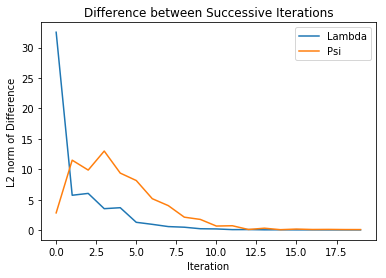

In [158]:
plt.plot(np.arange(ITERS), lam_diff, label='Lambda')
plt.plot(np.arange(ITERS), psi_diff, label="Psi")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('L2 norm of Difference')
plt.title('Difference between Successive Iterations')